## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder

## Importing Dataset

In [2]:
df = pd.read_csv(r'C:\Users\umair\OneDrive\Desktop\My Files\ExcelR\Assignments\Logistic Regression\bank-full.csv',delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Data Analysis

In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [7]:
df.select_dtypes(object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


## Label Encoding

In [8]:
le = LabelEncoder()

In [9]:
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['y'] = le.fit_transform(df['y'])


In [10]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [11]:
x = df.iloc[:,:-1]
y = df['y']

## Standardization

In [12]:
sc = StandardScaler()

x = sc.fit_transform(x)
x

array([[ 1.60696496, -0.10381968, -0.27576178, ..., -0.41145311,
        -0.25194037,  0.44489814],
       [ 0.28852927,  1.42400783,  1.3683719 , ..., -0.41145311,
        -0.25194037,  0.44489814],
       [-0.74738448, -0.71495069, -0.27576178, ..., -0.41145311,
        -0.25194037,  0.44489814],
       ...,
       [ 2.92540065,  0.20174582, -0.27576178, ...,  1.43618859,
         1.05047333, -0.56617504],
       [ 1.51279098, -1.02051619, -0.27576178, ..., -0.41145311,
        -0.25194037,  0.44489814],
       [-0.37068857, -0.71495069, -0.27576178, ...,  1.4761376 ,
         4.52357654, -1.57724822]])

## Model Building

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
lg = LogisticRegression()

lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

## Model Evaluation

In [15]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.59      0.21      0.31      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.60      0.62      9043
weighted avg       0.87      0.89      0.87      9043



In [16]:
conf = confusion_matrix(ytest,ypred)
conf

array([[7837,  156],
       [ 830,  220]], dtype=int64)

Text(50.722222222222214, 0.5, 'Predicted Values')

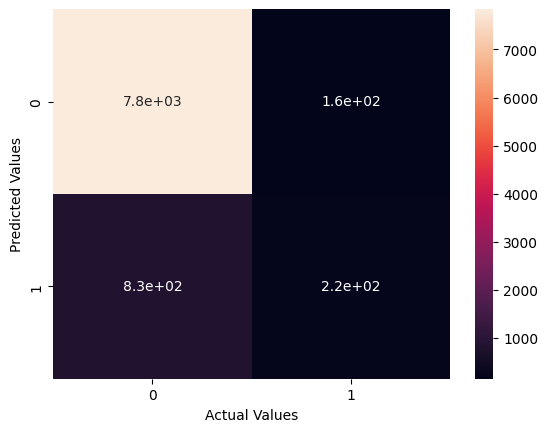

In [17]:
sns.heatmap(conf,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

## Threshold

In [18]:
proba = lg.predict_proba(xtest)[:,1]
proba

array([0.01361438, 0.03647377, 0.25190726, ..., 0.15243753, 0.0069128 ,
       0.08003375])

In [19]:
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score

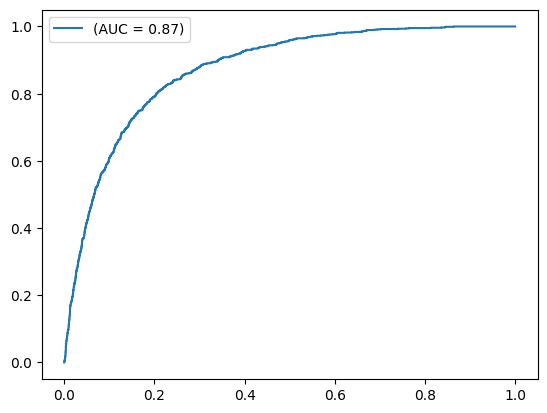

In [20]:
auc = roc_auc_score(ytest,proba)

fpr,tpr,threshold = roc_curve(ytest,proba)

plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()

In [21]:
auc

0.8728367083102476

In [22]:
threshold

array([1.99997313e+00, 9.99973128e-01, 9.99962219e-01, ...,
       1.28400767e-02, 1.28394700e-02, 6.92082582e-05])

In [23]:
len(threshold)

1391

In [24]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))
    
final_threshold = pd.concat([pd.Series(threshold),pd.Series(accuracy)],axis=1)
final_threshold.columns = ['Threshold','Accuracy']

In [25]:
final_threshold.sort_values(by='Accuracy', ascending=False)

,Threshold,Accuracy
225,0.421333,0.891850
222,0.424375,0.891850
221,0.424529,0.891739
240,0.415108,0.891739
224,0.422807,0.891739
...,...,...
1386,0.013926,0.252571
1387,0.013924,0.252460
1388,0.012840,0.236868
1389,0.012839,0.236758


In [26]:
from sklearn.preprocessing import binarize

In [27]:
y = binarize([proba], threshold=0.421333)[0]
y

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7993
           1       0.57      0.27      0.37      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.62      0.65      9043
weighted avg       0.87      0.89      0.87      9043



Text(0, 0.5, 'True Positive Rate')

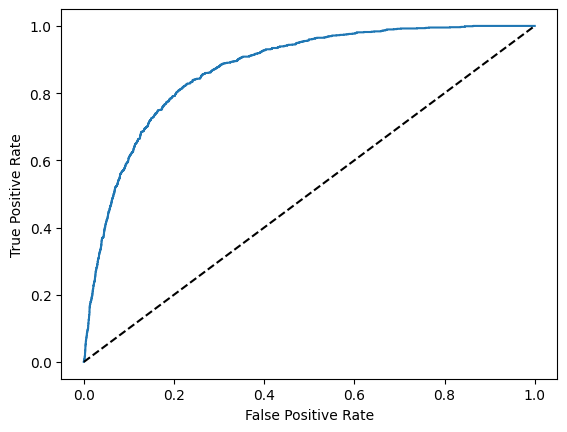

In [29]:
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)')
plt.plot([0, 1], [0, 1],'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')